In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm
# from statsmodels.graphics.regressionplots import abline_plot
plt.style.use('seaborn-darkgrid')

In [3]:
national_demand = pd.read_csv('../data/demand_lower_48')

In [4]:
national_demand.head()

,Time,Megawatthours
0,03/21/21 20:00 -0400,390453
1,03/21/21 19:00 -0400,379932
2,03/21/21 18:00 -0400,371950
3,03/21/21 17:00 -0400,365016
4,03/21/21 16:00 -0400,363364


In [5]:
def drop_utc(string):
    return string[:-6]

In [6]:
national_demand['Time'] = national_demand['Time'].apply(lambda x: drop_utc(x))

In [7]:
national_demand['Time'] = pd.to_datetime(national_demand['Time'], errors='coerce')

In [8]:
national_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50180 entries, 0 to 50179
Data columns (total 2 columns):
Time             50180 non-null datetime64[ns]
Megawatthours    50180 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 784.1 KB


In [9]:
national_demand = national_demand.loc[::-1]

In [10]:
national_demand.head()

,Time,Megawatthours
50179,2015-07-01 01:00:00,162827
50178,2015-07-01 02:00:00,335153
50177,2015-07-01 03:00:00,333837
50176,2015-07-01 04:00:00,398386
50175,2015-07-01 05:00:00,388954


In [11]:
national_demand = national_demand.iloc[1:]

In [12]:
national_demand.head()

,Time,Megawatthours
50178,2015-07-01 02:00:00,335153
50177,2015-07-01 03:00:00,333837
50176,2015-07-01 04:00:00,398386
50175,2015-07-01 05:00:00,388954
50174,2015-07-01 06:00:00,392487


In [13]:
national_demand['Year'] = national_demand['Time'].dt.year
national_demand['Month'] = national_demand['Time'].dt.month
national_demand['Hour'] = national_demand['Time'].dt.hour
national_demand['Day_of_week'] = national_demand['Time'].dt.dayofweek
national_demand['Day_of_month'] = national_demand['Time'].dt.day
national_demand['Day_of_year'] = national_demand['Time'].dt.dayofyear
# national_demand['Week_of_year'] = national_demand['Time'].dt.isocalendar().week

In [14]:
national_demand.head()

,Time,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
50178,2015-07-01 02:00:00,335153,2015,7,2,2,1,182
50177,2015-07-01 03:00:00,333837,2015,7,3,2,1,182
50176,2015-07-01 04:00:00,398386,2015,7,4,2,1,182
50175,2015-07-01 05:00:00,388954,2015,7,5,2,1,182
50174,2015-07-01 06:00:00,392487,2015,7,6,2,1,182


In [15]:
national_demand.set_index('Time', inplace=True, drop=True)

In [16]:
national_demand.head()

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
Time,,,,,,,
2015-07-01 02:00:00,335153,2015,7,2,2,1,182
2015-07-01 03:00:00,333837,2015,7,3,2,1,182
2015-07-01 04:00:00,398386,2015,7,4,2,1,182
2015-07-01 05:00:00,388954,2015,7,5,2,1,182
2015-07-01 06:00:00,392487,2015,7,6,2,1,182


In [17]:
split_date = '2020-03-01 00:00:00'
train = national_demand.loc[:split_date]
test = national_demand.loc[split_date:]
res_index_df = national_demand.reset_index()
split_index = res_index_df.loc[res_index_df['Time'] == split_date].index
split_index

Int64Index([40919], dtype='int64')

In [18]:
test.head()

,Megawatthours,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
Time,,,,,,,
2020-03-01 00:00:00,427034,2020,3,0,6,1,61
2020-03-01 01:00:00,414549,2020,3,1,6,1,61
2020-03-01 02:00:00,405844,2020,3,2,6,1,61
2020-03-01 03:00:00,401647,2020,3,3,6,1,61
2020-03-01 04:00:00,399975,2020,3,4,6,1,61


In [19]:
X_train = train
y_train = train.pop('Megawatthours')

In [20]:
X_train

,Year,Month,Hour,Day_of_week,Day_of_month,Day_of_year
Time,,,,,,
2015-07-01 02:00:00,2015,7,2,2,1,182
2015-07-01 03:00:00,2015,7,3,2,1,182
2015-07-01 04:00:00,2015,7,4,2,1,182
2015-07-01 05:00:00,2015,7,5,2,1,182
2015-07-01 06:00:00,2015,7,6,2,1,182
2015-07-01 07:00:00,2015,7,7,2,1,182
2015-07-01 08:00:00,2015,7,8,2,1,182
2015-07-01 09:00:00,2015,7,9,2,1,182
2015-07-01 10:00:00,2015,7,10,2,1,182


In [21]:
y_train

Time
2015-07-01 02:00:00    335153
2015-07-01 03:00:00    333837
2015-07-01 04:00:00    398386
2015-07-01 05:00:00    388954
2015-07-01 06:00:00    392487
2015-07-01 07:00:00    404647
2015-07-01 08:00:00    422227
2015-07-01 09:00:00    442131
2015-07-01 10:00:00    464371
2015-07-01 11:00:00    491512
2015-07-01 12:00:00    518043
2015-07-01 13:00:00    540514
2015-07-01 14:00:00    560701
2015-07-01 15:00:00    576400
2015-07-01 16:00:00    587405
2015-07-01 17:00:00    594477
2015-07-01 18:00:00    595242
2015-07-01 19:00:00    586317
2015-07-01 20:00:00    572656
2015-07-01 21:00:00    554682
2015-07-01 22:00:00    543332
2015-07-01 23:00:00    520871
2015-07-02 00:00:00    485722
2015-07-02 01:00:00    453284
2015-07-02 02:00:00    429199
2015-07-02 03:00:00    407007
2015-07-02 04:00:00    395194
2015-07-02 05:00:00    387654
2015-07-02 06:00:00    390157
2015-07-02 07:00:00    401643
                        ...  
2020-02-28 19:00:00    457840
2020-02-28 20:00:00    467560
2020-

In [22]:
training_mean = np.mean(y_train)
training_mean

456890.2967741935

In [23]:
from xgboost import XGBRegressor

/usr/local/lib/python3.5/dist-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)


In [24]:
xgb_reg = XGBRegressor(n_estimators=1000)

In [25]:
X_train = X_train.astype('int')

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40920 entries, 2015-07-01 02:00:00 to 2020-03-01 00:00:00
Data columns (total 6 columns):
Year            40920 non-null int64
Month           40920 non-null int64
Hour            40920 non-null int64
Day_of_week     40920 non-null int64
Day_of_month    40920 non-null int64
Day_of_year     40920 non-null int64
dtypes: int64(6)
memory usage: 2.2 MB


In [26]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [28]:
X_test = test
X_test = X_test.astype('int')
y_test = X_test.pop('Megawatthours')

In [28]:
preds = xgb_reg.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
baseline = np.sqrt(mean_squared_error(np.array([training_mean]*len(y_test)), y_test))

In [31]:
baseline

75351.85801762309

In [32]:
xgb_rmse = np.sqrt(mean_squared_error(preds, y_test))

In [33]:
xgb_rmse

34349.98208789017

In [43]:
def plot_timeseries(ax, series, title=None, label=None):
    ax.plot(series, label=label)
    ax.set_title(title)

In [35]:
prediction_series = pd.Series(preds, index=y_test.index)
prediction_series

Time
2020-03-01 00:00:00    427226.81250
2020-03-01 01:00:00    415336.56250
2020-03-01 02:00:00    404330.53125
2020-03-01 03:00:00    398214.09375
2020-03-01 04:00:00    390662.37500
2020-03-01 05:00:00    389555.93750
2020-03-01 06:00:00    393365.87500
2020-03-01 07:00:00    402298.37500
2020-03-01 08:00:00    399034.15625
2020-03-01 09:00:00    410002.18750
2020-03-01 10:00:00    415641.37500
2020-03-01 11:00:00    426113.78125
2020-03-01 12:00:00    411011.65625
2020-03-01 13:00:00    403247.06250
2020-03-01 14:00:00    399875.84375
2020-03-01 15:00:00    396830.81250
2020-03-01 16:00:00    398535.59375
2020-03-01 17:00:00    397918.90625
2020-03-01 18:00:00    403561.18750
2020-03-01 19:00:00    418477.31250
2020-03-01 20:00:00    428290.03125
2020-03-01 21:00:00    430235.31250
2020-03-01 22:00:00    433169.46875
2020-03-01 23:00:00    418529.68750
2020-03-02 00:00:00    413306.12500
2020-03-02 01:00:00    405068.37500
2020-03-02 02:00:00    395952.90625
2020-03-02 03:00:00    

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


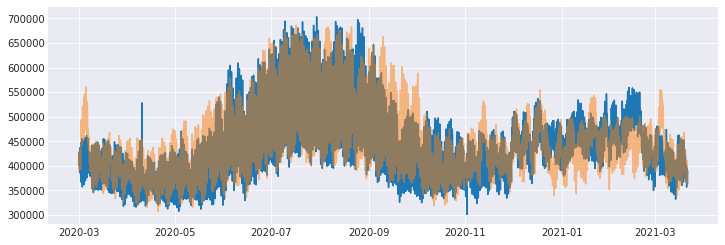

In [36]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test)
ax.plot(prediction_series, alpha=.5)
plt.show()

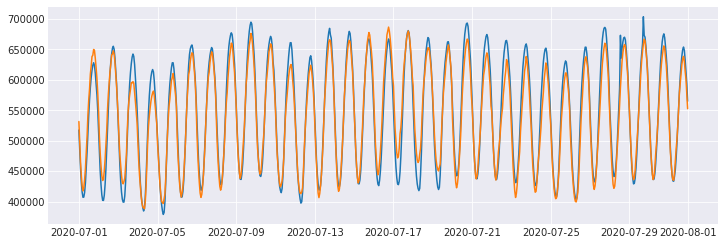

In [37]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plot_timeseries(ax, prediction_series.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plt.show()

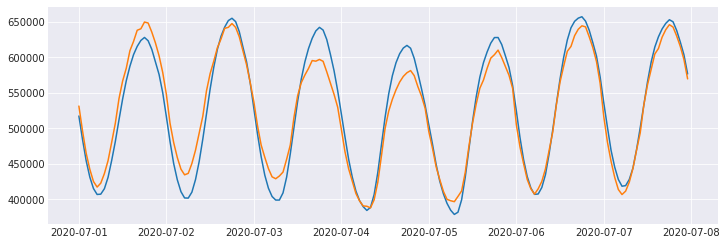

In [38]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-01 00:00:00': '2020-07-07 23:00:00'])
plot_timeseries(ax, prediction_series.loc['2020-07-01 00:00:00': '2020-07-07 23:00:00'])
plt.show()

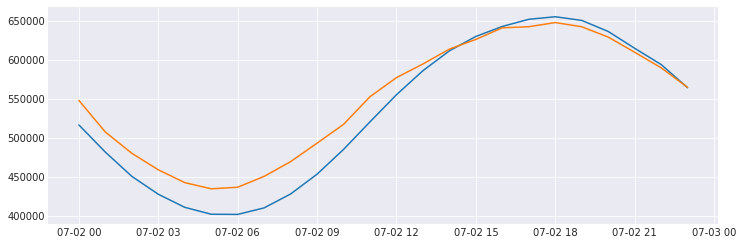

In [39]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-02 00:00:00': '2020-07-02 23:00:00'])
plot_timeseries(ax, prediction_series.loc['2020-07-02 00:00:00': '2020-07-02 23:00:00'])
plt.show()

In [1]:
def mean_abs_percent_error(y_test, y_pred):
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred)/y_test)) * 100

In [41]:
mean_abs_percent_error(y_test, preds)

6.0616324281567335

In [31]:
xgb_grid = {'learning_rate': [.01, .05, .1, .2],
                'max_depth': [2, 4, 8],
                'min_samples_leaf': [2, 4], 
                'max_features': ['sqrt', 'log2', None],
                'n_estimators': [500, 1000, 1500]}

In [32]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit


In [33]:
tscv = TimeSeriesSplit(n_splits=5)

In [34]:
xgbr_gridsearch = GridSearchCV(XGBRegressor(random_state=1), 
                            xgb_grid,
                            cv=tscv,
                            n_jobs=-1,
                            verbose=True,
                            scoring='neg_root_mean_squared_error')

In [35]:
xgbr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 19.5min finished


[00:12:10] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
             error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [2, 4, 8],
                         'max_features': ['sqrt

In [36]:
xgbr_gridsearch.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 500}

In [37]:
best_gridsearch = XGBRegressor(**xgbr_gridsearch.best_params_)

In [38]:
best_gridsearch.fit(X_train, y_train)

[00:24:26] WARNING: /workspace/src/learner.cc:480: 
Parameters: { max_features, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=2,
             max_features='sqrt', min_child_weight=1, min_samples_leaf=2,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [54]:
best_gridsearch.feature_importances_

array([0.03771469, 0.16702561, 0.36869958, 0.15295038, 0.0199789 ,
       0.2536308 ], dtype=float32)

In [55]:
X_train.columns

Index(['Year', 'Month', 'Hour', 'Day_of_week', 'Day_of_month', 'Day_of_year'], dtype='object')

In [56]:
Features = ['Year', 'Month', 'Hour', 'Day of Week', 'Day of Month', 'Day of Year']

In [59]:
imp_df = pd.DataFrame({'features': Features, 'importances':best_gridsearch.feature_importances_})
imp_df.sort_values('importances', inplace=True)
imp_df

,features,importances
4,Day of Month,0.019979
0,Year,0.037715
3,Day of Week,0.152950
1,Month,0.167026
5,Day of Year,0.253631
2,Hour,0.368700


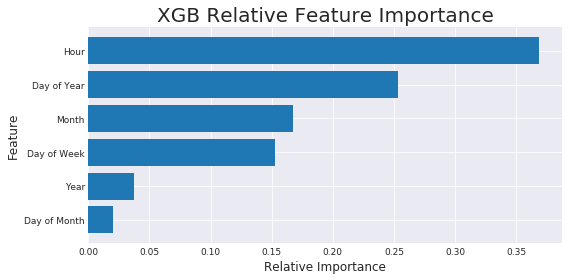

In [71]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(imp_df['features'], imp_df['importances'])
ax.set_title('XGB Relative Feature Importance', size=20)
ax.set_ylabel('Feature', size=12)
ax.set_xlabel('Relative Importance', size=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
fig.tight_layout()
plt.savefig('../images/xgb_feature_imps.png', dpi=500)
plt.show()

In [39]:
best_preds = best_gridsearch.predict(X_test)

In [40]:
mean_abs_percent_error(y_test, best_preds)

5.82228581698496

In [41]:
best_preds_series = pd.Series(best_preds, index=y_test.index)

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


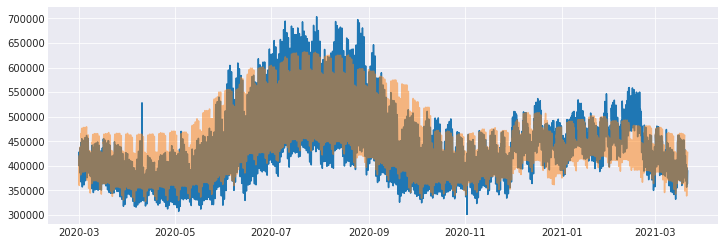

In [44]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test)
ax.plot(best_preds_series, alpha=.5)
plt.show()

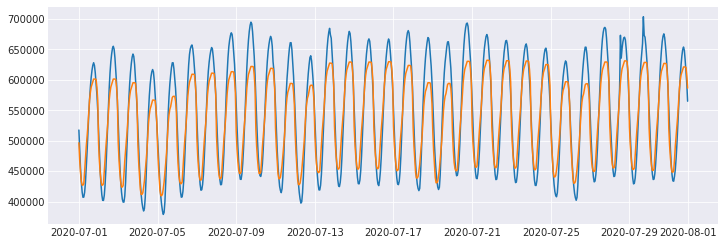

In [45]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_timeseries(ax, y_test.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plot_timeseries(ax, best_preds_series.loc['2020-07-01 00:00:00': '2020-07-31 23:00:00'])
plt.show()

In [46]:
best_xgb_rmse = np.sqrt(mean_squared_error(best_preds, y_test))
best_xgb_rmse

NameError: name 'mean_squared_error' is not defined

In [47]:
from xgboost import plot_importance, plot_tree

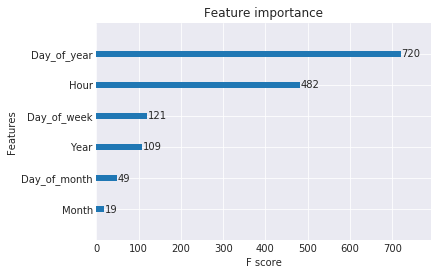

In [52]:
plot_importance(best_gridsearch);